## Notebook for CNNs

### Part 1

#### (a)
As the assignment specifies that we must use vanilla python, I implemented the feature without numpy, I also created a printConvolved function so that it would be easier to read the output. I also assumed that the stride would always be 1, so as to simplify the question since it was never specified.

To convolve a matrix, I simply loop through all the points that could be multiplied by the top left corner element in the kernel, I then get the local matrix, a sub matrix that contains the points that will be multiplied by the kernel for this iteration, and since this is done in vanilla python I have to multiply the matrix out, the flatten it to a 1d list, then sum the values inside to get an element in the convolved array.

In [2]:
def convolve(n, k):
    outputLen = len(n) - len(k) + 1
    convMatrix = []
    localMatrixSizeModifier = len(k)
    for row in range(outputLen):
        convRow = []
        for col in range(outputLen):
            localMatrix = [i[col : col + localMatrixSizeModifier] for i in n[row : row + localMatrixSizeModifier]]
            multMatrices = [[x * y for x, y in zip(a, b)] for a, b in zip(localMatrix, k)]
            flattenedMatrices = sum(multMatrices, [])
            convRow.append(sum(flattenedMatrices))
        convMatrix.append(convRow)
    return convMatrix

The print function will simply add walls to the ends of each row, and will add the correct number of spaces for each each input so that they will all sit at a uniform starting place for the first number, the largest number is considered to be in the thousands, and a space before any number if it is not negative.

In [3]:
import math

def printConvolved(c):
    for row in c:
        toPrint = '|'
        for elem in row:
            if elem != 0:
                newElem = ''
                logged = math.log10(abs(elem))
                if logged % 1 != 0:
                    spaces = 5 - (math.ceil(logged))
                else:
                    spaces = 4 - (math.ceil(logged))
                newElem = str(elem) + (' ' * spaces)
                if elem > 0:
                    newElem = ' ' + newElem
                toPrint += newElem
            else:
                toPrint += ' ' + str(elem) + (' ' * 4)
        print(toPrint + '|')

In [4]:
n = [[1, 2, 3, 4, 5], 
    [1, 3, 2, 3, 10], 
    [3, 2, 1, 4, 5], 
    [6, 1, 1, 2, 2], 
    [3, 2, 1, 5, 4]]
k = [[1, 0, -1], 
    [1, 0, -1], 
    [1, 0, -1]]

printConvolved(convolve(n, k))

|-1    -4    -14   |
| 6    -3    -13   |
| 9    -6    -8    |


#### (b)
The image I used for this was a black square that was placed on a 40x40 white page, the square does not take up the whole page, I chose this size because on my 13" screen, when convolved and printed with the function I made, it fits perfectly width wise in a terminal, making it easy to read and understand. 

In [5]:
import numpy as np
import PIL.Image as Image

im = Image.open('square.jpg')
rgb = np.array(im.convert('RGB'))
r = rgb[:,:,0]

kernel1 = [[-1, -1, -1], 
           [-1, 8, -1], 
           [-1, -1, -1]]
kernel2 = [[0, -1, 0], 
           [-1, 8, -1], 
           [0, -1, 0]]
con1 = convolve(r, kernel1)
printConvolved(con1)
print("\n\n")
con2 = convolve(r, kernel2)
printConvolved(con2)

| 0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    |
| 0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    |
| 0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    |
| 0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    |
| 0     0     0     0     0     0     0     0     0     0     0     0     0 

### Part 2

Code:

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, LeakyReLU, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

def modelCreation(x_train, num_classes, c=0.001, pool=False, deeper=False):
    model = keras.Sequential()
    if not deeper:
        if pool:
            model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
            model.add(Conv2D(16, kernel_size=(3,3,), padding="same", activation="relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
            model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
        else:
            model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
            model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
            model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
            model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(c)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()
    else:
        model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
        model.add(Conv2D(8, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2),  padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation ='softmax', kernel_regularizer=regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.summary()
    return model

def runModel(n=5000, c=0.001, pool=False, deeper=False, title=''):
    # Model / data parameters
    num_classes = 10
    input_shape = (32, 32, 3)

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

    # takes the first 5000 datapoints in x_train and y_train
    x_train = x_train[1:n]; y_train=y_train[1:n]
    #x_test=x_test[1:500]; y_test=y_test[1:500]

    # images are originaly in 0-255 values, regularize them to 0-1
    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # data currently saved as a vector with numbers 0-9, instead, turn each y into a list of binary numbers, with 9 elements in each list
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = modelCreation(x_train, num_classes, c, pool, deeper)

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))

#### (a)
The code here creates a convolutional neural network where each hidden layer uses relu for the activation function, 3x3 kernels and same padding. The first layer makes 16 output channels, the second layer has 16 output channels and uses a stride of 2, the third layer outputs 32 channels, and the 4th hidden layer outputs 32 channels and uses a stride of 2 again. We use a dropout regularizer of 50% and then use a soft max dense layer with an l1 regularizer with c = 0.0001.

It uses batch sizes of 128 and will train the model over 20 epochs.

#### (b)

(i) The model has parameters, and the layer with the most parameters is the final layer implementing the softmax algorithm, this is because this is a fully connected layer which connects all of the parameters to a number of neurons, each of which is checking the likelihood that our input corresponds to some class.

(ii) From the plots we can see that, towards the end, there is some overfitting going on, however, it doesn't appear to be significant, still, we should probably restrict the training of the model to 11 or 12 epochs to limit the overfitting.

(iii)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)    

2021-11-17 14:19:58.959458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-17 14:19:58.959493: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-17 14:19:58.959516: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brendan-bladestealth): /proc/driver/nvidia/version does not exist
2021-11-17 14:19:58.959817: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
36/36 [==============================] - 2s 53ms/step - loss: 2.5909 - accuracy: 0.1403 - val_loss: 2.3416 - val_accuracy: 0.1600
Epoch 2/20
36/36 [==============================] - 2s 47ms/step - loss: 2.1275 - accuracy: 0.2701 - val_loss: 2.0095 - val_accuracy: 0.3260
Epoch 3/20
36/36 [==============================] - 2s 48ms/step - loss: 1.9406 - accuracy: 0.3476 - val_loss: 1.8825 - val_accuracy: 0.3880
Epoch 4/20
36/36 [==============================] - 2s 55ms/step - loss: 1.8602 - accuracy: 0.3781 - val_loss: 1.8090 - val_accuracy: 0.4480
Epoch 5/20
36/36 [==============================] - 2s 53ms/step - loss: 1.7892 - accuracy: 0.4096 - val_loss: 1.7817 - val_accuracy: 0.4440
Epoch 6/20
36/36 [==============================] - 2s 52ms/step - loss: 1.7441 - accuracy: 0.4265 - val_loss: 1.7924 - val_accuracy: 0.4300
Epoch 7/20
36/36 [==============================] - 2s 51ms/step - loss: 1.7161 - accuracy: 0.4370 - val_loss: 1.7249 - val_accuracy: 0.4520
Epoch 8/20
36

2021-11-17 14:20:34.344094: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cifar.model/assets


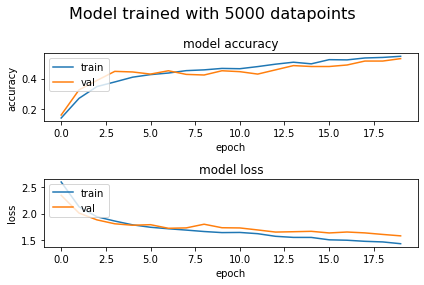

              precision    recall  f1-score   support

           0       0.53      0.73      0.61       505
           1       0.61      0.83      0.70       460
           2       0.61      0.35      0.44       519
           3       0.55      0.47      0.51       486
           4       0.59      0.47      0.52       519
           5       0.58      0.56      0.57       488
           6       0.62      0.68      0.65       518
           7       0.59      0.72      0.65       486
           8       0.72      0.68      0.70       520
           9       0.72      0.62      0.67       498

    accuracy                           0.61      4999
   macro avg       0.61      0.61      0.60      4999
weighted avg       0.61      0.61      0.60      4999

[[370  38   6   3   6   3   4  15  50  10]
 [ 10 384   1   2   6   0   7   4  18  28]
 [ 76  19 180  27  58  39  47  48  18   7]
 [ 21  10  18 230  23  75  49  34   7  19]
 [ 50  11  36  30 243  31  49  51  10   8]
 [ 15   8  22  53  22 271 

2021-11-17 14:20:36.481089: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


              precision    recall  f1-score   support

           0       0.45      0.64      0.53      1000
           1       0.58      0.76      0.66      1000
           2       0.49      0.27      0.35      1000
           3       0.35      0.28      0.31      1000
           4       0.46      0.33      0.39      1000
           5       0.44      0.43      0.43      1000
           6       0.56      0.63      0.60      1000
           7       0.49      0.62      0.55      1000
           8       0.58      0.61      0.59      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000

[[644  58  15  17  16  15  12  19 170  34]
 [ 43 759   6  11   7   4  12  15  66  77]
 [169  27 266  80 108  98  95  98  33  26]
 [ 76  35  43 278  70 204 110 114  25  45]
 [ 87  26  95  64 332  71 134 162  18  11]
 [ 41  20  51 163  61 430 

2021-11-17 14:20:39.560223: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 110579712 exceeds 10% of free system memory.


Epoch 1/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3540 - accuracy: 0.2000 - val_loss: 2.0418 - val_accuracy: 0.3080
Epoch 2/20
71/71 [==============================] - 3s 46ms/step - loss: 1.9564 - accuracy: 0.3396 - val_loss: 1.9233 - val_accuracy: 0.3530
Epoch 3/20
71/71 [==============================] - 3s 43ms/step - loss: 1.8370 - accuracy: 0.3888 - val_loss: 1.7697 - val_accuracy: 0.3860
Epoch 4/20
71/71 [==============================] - 3s 41ms/step - loss: 1.7693 - accuracy: 0.4109 - val_loss: 1.7120 - val_accuracy: 0.4210
Epoch 5/20
71/71 [==============================] - 3s 41ms/step - loss: 1.7365 - accuracy: 0.4278 - val_loss: 1.7145 - val_accuracy: 0.4310
Epoch 6/20
71/71 [==============================] - 3s 41ms/step - loss: 1.7130 - accuracy: 0.4383 - val_loss: 1.7100 - val_accuracy: 0.4180
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 1.6800 - accuracy: 0.4507 - val_loss: 1.6421 - val_accuracy: 0.4460
Epoch 8/20
71

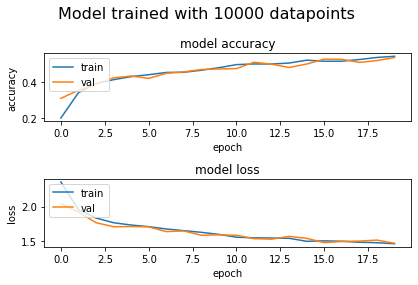

2021-11-17 14:21:42.804574: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122867712 exceeds 10% of free system memory.


              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1005
           1       0.68      0.75      0.71       974
           2       0.55      0.42      0.47      1032
           3       0.48      0.40      0.44      1016
           4       0.58      0.40      0.48       999
           5       0.46      0.60      0.52       937
           6       0.59      0.71      0.65      1029
           7       0.60      0.68      0.64      1001
           8       0.64      0.69      0.67      1025
           9       0.66      0.63      0.64       981

    accuracy                           0.58      9999
   macro avg       0.58      0.58      0.58      9999
weighted avg       0.58      0.58      0.58      9999

[[555  64  26  17  19  14  12  38 207  53]
 [ 21 731   3   5   8   9  28  16  53 100]
 [ 98  18 431  69  78 114  91  78  39  16]
 [ 23   9  57 411  39 266 116  57  12  26]
 [ 55   5 130  70 404  79 119 109  14  14]
 [ 15   6  44 135  31 566 

2021-11-17 14:21:45.826350: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0.64      0.71      0.67      1000
           2       0.45      0.35      0.39      1000
           3       0.39      0.31      0.35      1000
           4       0.51      0.31      0.39      1000
           5       0.42      0.54      0.47      1000
           6       0.54      0.68      0.60      1000
           7       0.54      0.65      0.59      1000
           8       0.61      0.68      0.64      1000
           9       0.62      0.56      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.54      0.53     10000

[[545  57  49  20   8  16  21  26 208  50]
 [ 35 708   9  10   4   9  21  26  51 127]
 [ 85  14 350  81  88 143 104  78  41  16]
 [ 33  16  57 314  50 290 124  74  14  28]
 [ 48  12 148  75 314  88 150 132  22  11]
 [ 16   6  63 144  38 541 

2021-11-17 14:21:48.773365: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 221171712 exceeds 10% of free system memory.


Epoch 1/20
141/141 [==============================] - 6s 42ms/step - loss: 2.2066 - accuracy: 0.2723 - val_loss: 1.8686 - val_accuracy: 0.3945
Epoch 2/20
141/141 [==============================] - 6s 42ms/step - loss: 1.8590 - accuracy: 0.3872 - val_loss: 1.7503 - val_accuracy: 0.4335
Epoch 3/20
141/141 [==============================] - 6s 42ms/step - loss: 1.7745 - accuracy: 0.4174 - val_loss: 1.7122 - val_accuracy: 0.4420
Epoch 4/20
141/141 [==============================] - 6s 43ms/step - loss: 1.7328 - accuracy: 0.4278 - val_loss: 1.7161 - val_accuracy: 0.4390
Epoch 5/20
141/141 [==============================] - 6s 43ms/step - loss: 1.6825 - accuracy: 0.4442 - val_loss: 1.6661 - val_accuracy: 0.4550
Epoch 6/20
141/141 [==============================] - 6s 42ms/step - loss: 1.6500 - accuracy: 0.4519 - val_loss: 1.6003 - val_accuracy: 0.4775
Epoch 7/20
141/141 [==============================] - 6s 41ms/step - loss: 1.6119 - accuracy: 0.4729 - val_loss: 1.5441 - val_accuracy: 0.5010

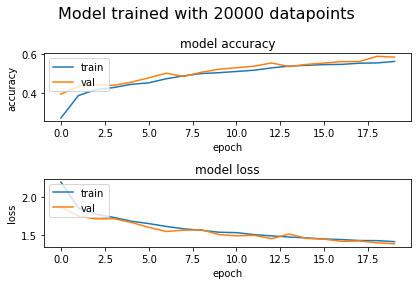

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1989
           1       0.63      0.82      0.71      1981
           2       0.56      0.47      0.51      2042
           3       0.47      0.49      0.48      2011
           4       0.59      0.46      0.52      2009
           5       0.64      0.39      0.49      1925
           6       0.70      0.69      0.70      2037
           7       0.60      0.74      0.66      2027
           8       0.71      0.69      0.70      2012
           9       0.64      0.72      0.68      1966

    accuracy                           0.61     19999
   macro avg       0.61      0.61      0.61     19999
weighted avg       0.61      0.61      0.61     19999

[[1313  132   61   29   27    8    7   44  239  129]
 [  42 1615   13    7    5    5   15   20   74  185]
 [ 214   49  967  157  207   64  102  160   61   61]
 [  60   57  146  987  100  209  175  139   45   93]
 [ 121   39  194  167  931   

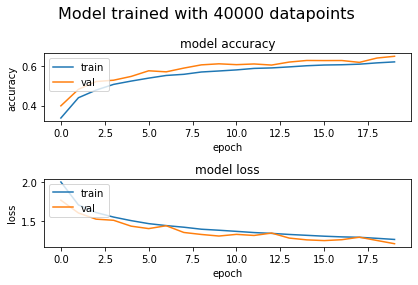

              precision    recall  f1-score   support

           0       0.81      0.56      0.66      3986
           1       0.83      0.82      0.82      3986
           2       0.54      0.60      0.57      4048
           3       0.47      0.57      0.51      3984
           4       0.65      0.56      0.60      4003
           5       0.66      0.50      0.57      3975
           6       0.68      0.81      0.74      4019
           7       0.67      0.75      0.71      4023
           8       0.74      0.83      0.78      3997
           9       0.81      0.73      0.77      3978

    accuracy                           0.67     39999
   macro avg       0.68      0.67      0.67     39999
weighted avg       0.68      0.67      0.67     39999

[[2227   95  476  159   88   32   44   97  599  169]
 [  69 3282   44   43   14    7   55   50  150  272]
 [ 107    9 2413  365  348  159  357  177   88   25]
 [  21   15  316 2280  184  490  379  198   66   35]
 [  44   10  394  325 2231  1

In [2]:
N = [5000, 10000, 20000, 40000]

for n in N:
    runModel(n=n, title=f'Model trained with {n} datapoints')

(iv)

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)

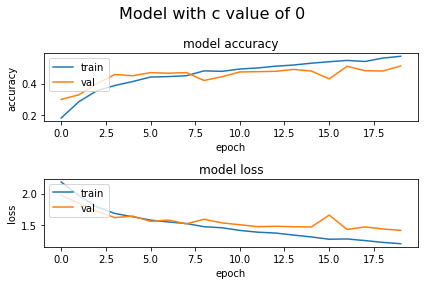

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       505
           1       0.70      0.72      0.71       460
           2       0.56      0.49      0.52       519
           3       0.63      0.39      0.48       486
           4       0.67      0.36      0.47       519
           5       0.54      0.68      0.60       488
           6       0.61      0.70      0.65       518
           7       0.60      0.69      0.64       486
           8       0.67      0.71      0.69       520
           9       0.58      0.76      0.66       498

    accuracy                           0.61      4999
   macro avg       0.62      0.61      0.60      4999
weighted avg       0.62      0.61      0.60      4999

[[325  12  19   3   5   3   4  15  79  40]
 [ 10 333   2   0   2   5   7   5  32  64]
 [ 41  10 252  20  20  50  51  46  12  17]
 [ 13   7  35 189  16 106  46  36   5  33]
 [ 39   9  62  18 185  47  68  65  13  13]
 [ 12   7  22  20  12 332 

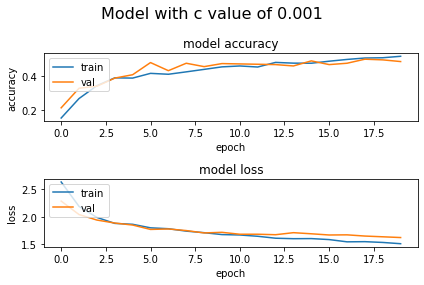

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       505
           1       0.65      0.79      0.71       460
           2       0.54      0.35      0.42       519
           3       0.53      0.35      0.42       486
           4       0.42      0.59      0.49       519
           5       0.49      0.57      0.53       488
           6       0.50      0.73      0.60       518
           7       0.65      0.55      0.60       486
           8       0.79      0.54      0.64       520
           9       0.68      0.65      0.67       498

    accuracy                           0.57      4999
   macro avg       0.59      0.57      0.57      4999
weighted avg       0.59      0.57      0.57      4999

[[303  37  35   5  35  10   6  16  36  22]
 [ 13 365   1   1   9   5  12   5  10  39]
 [ 17   8 180  21 135  48  75  20   5  10]
 [  5   8  22 172  49 104  93  12   2  19]
 [ 16   3  15  15 305  42  81  32   3   7]
 [  6   6  27  31  47 280 

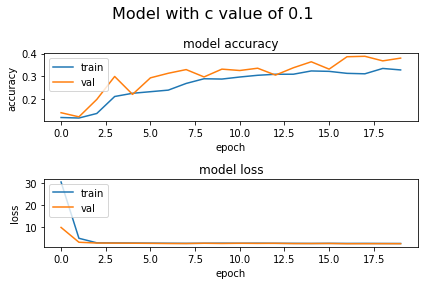

              precision    recall  f1-score   support

           0       0.37      0.03      0.05       505
           1       0.32      0.72      0.44       460
           2       0.31      0.12      0.18       519
           3       0.37      0.10      0.16       486
           4       0.29      0.34      0.32       519
           5       0.50      0.16      0.24       488
           6       0.38      0.58      0.46       518
           7       0.47      0.40      0.43       486
           8       0.31      0.71      0.43       520
           9       0.44      0.35      0.39       498

    accuracy                           0.35      4999
   macro avg       0.38      0.35      0.31      4999
weighted avg       0.37      0.35      0.31      4999

[[ 13  63  12   2  20   3   3  12 357  20]
 [  2 331   1   1   4   1  12   7  54  47]
 [  2  50  64  10 143  12  99  29 100  10]
 [  2  75  29  49  48  39 134  23  57  30]
 [  3  34  23  18 179   8 112  76  55  11]
 [  2  80  46  20  67  79 

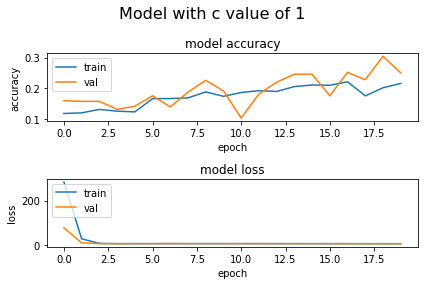

              precision    recall  f1-score   support

           0       0.28      0.64      0.39       505
           1       0.80      0.03      0.05       460
           2       0.12      0.02      0.03       519
           3       0.21      0.10      0.14       486
           4       0.19      0.07      0.10       519
           5       0.00      0.00      0.00       488
           6       0.23      0.85      0.36       518
           7       0.25      0.40      0.31       486
           8       0.18      0.05      0.08       520
           9       0.39      0.36      0.38       498

    accuracy                           0.25      4999
   macro avg       0.26      0.25      0.18      4999
weighted avg       0.26      0.25      0.18      4999

[[323   1   4  10   2   1  31  69  11  53]
 [165  12  22  29  14   3  87  55  29  44]
 [ 69   0   8  22  31   0 292  60  19  18]
 [ 39   1   6  50  19   4 263  76  10  18]
 [ 38   0   1  16  36   0 321  89   2  16]
 [ 43   0  13  49  36   0 

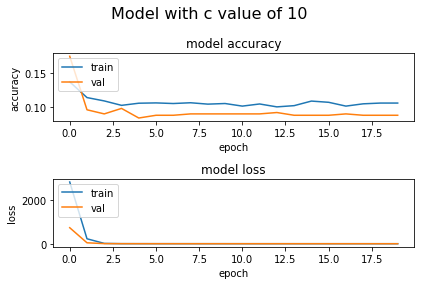

/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 488   0 

/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000   

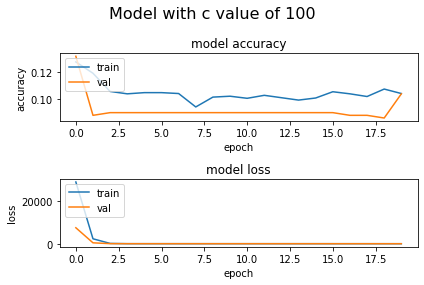

/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.11      0.71      0.20       519
           3       0.00      0.00      0.00       486
           4       0.08      0.24      0.12       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.37      0.15      0.21       520
           9       0.00      0.00      0.00       498

    accuracy                           0.11      4999
   macro avg       0.06      0.11      0.05      4999
weighted avg       0.06      0.11      0.06      4999

[[  0   0 272   0 151   0   0   0  82   0]
 [  0   0 237   0 213   0   0   0  10   0]
 [  0   0 369   0 129   0   0   0  21   0]
 [  0   0 370   0 113   0   0   0   3   0]
 [  0   0 389   0 127   0   0   0   3   0]
 [  0   0 357   0 130   0 

/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brendan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
Ci = [0, 0.001, 0.1, 1, 10, 100]

for c in Ci:
    runModel(c=c, title=f'Model with c value of {c}')

#### (c)


(i)

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_59 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_60 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)           

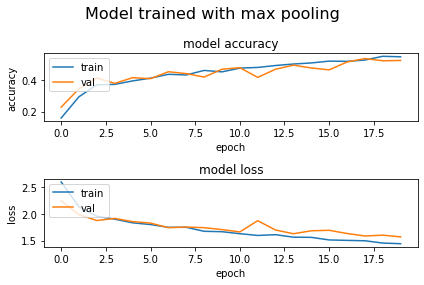

              precision    recall  f1-score   support

           0       0.55      0.75      0.64       505
           1       0.77      0.70      0.74       460
           2       0.52      0.50      0.51       519
           3       0.50      0.53      0.52       486
           4       0.48      0.60      0.53       519
           5       0.68      0.43      0.52       488
           6       0.66      0.65      0.66       518
           7       0.67      0.63      0.65       486
           8       0.76      0.64      0.69       520
           9       0.68      0.70      0.69       498

    accuracy                           0.61      4999
   macro avg       0.63      0.61      0.61      4999
weighted avg       0.63      0.61      0.61      4999

[[379  15  18   5  16   1   4  11  34  22]
 [ 20 324   4   1   9   0  12   5  21  64]
 [ 44   5 260  35  93  17  21  24  12   8]
 [ 10   4  39 260  45  39  46  21   7  15]
 [ 31   3  59  33 312  12  29  30   2   8]
 [ 11   2  47 102  44 209 

In [17]:
runModel(pool=True, title=f'Model trained with max pooling')

(ii)

#### (d)

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_55 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_56 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_57 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_12 (D

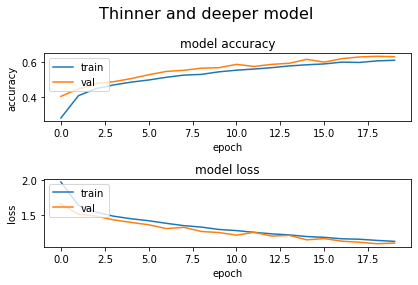

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      3986
           1       0.76      0.79      0.78      3986
           2       0.55      0.58      0.56      4048
           3       0.54      0.37      0.44      3984
           4       0.62      0.55      0.58      4003
           5       0.62      0.51      0.56      3975
           6       0.62      0.81      0.70      4019
           7       0.69      0.72      0.71      4023
           8       0.73      0.82      0.77      3997
           9       0.76      0.68      0.72      3978

    accuracy                           0.66     39999
   macro avg       0.66      0.66      0.65     39999
weighted avg       0.66      0.66      0.65     39999

[[3014   81  172   39   46   18   42   55  405  114]
 [ 146 3167   28    7   11    7   54   12  195  359]
 [ 358   21 2353  177  312  163  356  150  117   41]
 [ 112   37  415 1459  250  662  658  196  115   80]
 [ 196   25  469  143 2204   

In [16]:
runModel(deeper=True, n=40000, title=f'Thinner and deeper model')